In [1]:
import pandas as pd

In [33]:
df=pd.read_csv('long_data_jeans.csv')
df

Brands    s  Hips Waist
0    Aeropostale Size Charts    0  32.5  22.5
1    Aeropostale Size Charts    0  33.5  23.5
2    Aeropostale Size Charts    0  34.5  24.5
3    Aeropostale Size Charts    2  35.5  25.5
4    Aeropostale Size Charts    4  36.5  26.5
..                       ...  ...   ...   ...
123               Forever 21    S    36  25.5
124               Forever 21    M  38.5  27.5
125               Forever 21    L    41  28.5
126               Forever 21   XL    44    31
127               Forever 21  XXL    47    34

[128 rows x 4 columns]

In [34]:
cols_to_clean = ['Hips', 'Waist']
df[cols_to_clean] = df[cols_to_clean].apply(lambda col: col.str.replace('"', '', regex=False))
df

Brands    s  Hips Waist
0    Aeropostale Size Charts    0  32.5  22.5
1    Aeropostale Size Charts    0  33.5  23.5
2    Aeropostale Size Charts    0  34.5  24.5
3    Aeropostale Size Charts    2  35.5  25.5
4    Aeropostale Size Charts    4  36.5  26.5
..                       ...  ...   ...   ...
123               Forever 21    S    36  25.5
124               Forever 21    M  38.5  27.5
125               Forever 21    L    41  28.5
126               Forever 21   XL    44    31
127               Forever 21  XXL    47    34

[128 rows x 4 columns]

In [35]:
def average_range(val):
    # If the value is a string and contains a hyphen, assume it's a range
    if isinstance(val, str) and '-' in val:
        try:
            # Split the string at the hyphen and remove any extra whitespace
            low, high = val.split('-')
            low = low.strip()
            high = high.strip()
            return (float(low) + float(high)) / 2
        except Exception as e:
            print(f"Error processing value {val}: {e}")
            return None
    else:
        try:
            return float(val)
        except Exception as e:
            print(f"Error processing value {val}: {e}")
            return None

# Suppose your DataFrame 'df' has columns with ranges like '40-42' that are stored as objects.
# Specify the columns you want to process:
cols_to_average = ['Hips', 'Waist']  # replace with your actual column names

# Apply the function element-wise to these columns:
df[cols_to_average] = df[cols_to_average].applymap(average_range)

# Now the specified columns will contain the average (as a float) instead of the range string.
df

Error processing value 41‚Äù: could not convert string to float: '41‚Äù'
Error processing value 34..75: could not convert string to float: '34..75'


/var/folders/1_/vh5ppk9j3vvc6l2z4r6n7dbw0000gn/T/ipykernel_66642/2566738245.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols_to_average] = df[cols_to_average].applymap(average_range)


Brands    s  Hips  Waist
0    Aeropostale Size Charts    0  32.5   22.5
1    Aeropostale Size Charts    0  33.5   23.5
2    Aeropostale Size Charts    0  34.5   24.5
3    Aeropostale Size Charts    2  35.5   25.5
4    Aeropostale Size Charts    4  36.5   26.5
..                       ...  ...   ...    ...
123               Forever 21    S  36.0   25.5
124               Forever 21    M  38.5   27.5
125               Forever 21    L  41.0   28.5
126               Forever 21   XL  44.0   31.0
127               Forever 21  XXL  47.0   34.0

[128 rows x 4 columns]

In [36]:
df.dtypes

Brands     object
s          object
Hips      float64
Waist     float64
dtype: object

In [37]:
mapping = {
    "0": "XS",
    "2": "XS",
    "4": "S",
    "6": "S",
    "8": "M",
    "10": "M",
    "12": "L",
    "14": "L",
    "16": "XL",
    "18": "XL",
    "20": "XXL",
    "22": "XXXL"
}

# Strip spaces and apply mapping only if value is in the mapping, otherwise leave unchanged
df['s'] = df['s'].str.strip().apply(lambda x: mapping[x] if x in mapping else x)
df

Brands    s  Hips  Waist
0    Aeropostale Size Charts   XS  32.5   22.5
1    Aeropostale Size Charts   XS  33.5   23.5
2    Aeropostale Size Charts   XS  34.5   24.5
3    Aeropostale Size Charts   XS  35.5   25.5
4    Aeropostale Size Charts    S  36.5   26.5
..                       ...  ...   ...    ...
123               Forever 21    S  36.0   25.5
124               Forever 21    M  38.5   27.5
125               Forever 21    L  41.0   28.5
126               Forever 21   XL  44.0   31.0
127               Forever 21  XXL  47.0   34.0

[128 rows x 4 columns]

In [38]:
df.to_csv('jeans_forever123.csv')

In [23]:
df.dtypes

Brands     object
s          object
Hips      float64
Waist     float64
dtype: object

In [4]:
df.drop(columns=['Unnamed: 7', 'Unnamed: 8','Unnamed: 9','Unnamed: 10',	'Unnamed: 11',	'Unnamed: 12',], inplace=True)
df

Brands                   Unnamed: 1  \
0    Abercrombie & Fitch Size Charts                        Tops   
1    Abercrombie & Fitch Size Charts                        Tops   
2    Abercrombie & Fitch Size Charts                        Tops   
3    Abercrombie & Fitch Size Charts                        Tops   
4                            Addidas                        Tops   
..                               ...                         ...   
705                      FashionNova  Shirts, T-shirts, Sweaters   
706                      FashionNova  Shirts, T-shirts, Sweaters   
707                      FashionNova  Shirts, T-shirts, Sweaters   
708                      FashionNova  Shirts, T-shirts, Sweaters   
709                      FashionNova  Shirts, T-shirts, Sweaters   

    Letter Sizing    Bust     Waist    Hips           Type  Unnamed: 13  \
0              XS     32.5      NaN      NaN           NaN          NaN   
1               S     34.5      NaN      NaN           NaN          NaN   
2               M     36.5      NaN      NaN           NaN          NaN   
3               L       38      NaN      NaN           NaN          NaN   
4             XXS     29.3       23     32.9           NaN          NaN   
..            ...      ...      ...      ...           ...          ...   
705             L    39.25    31.25     42.5  Fast fashion          NaN   
706            XL     41.5     33.5     44.5  Fast fashion          NaN   
707            1X  44-45.5  37-38.5  47-48.5           NaN          NaN   
708            2X    47-49    40-42    50-52           NaN          NaN   
709            3X    51-53    44-46    54-56           NaN          NaN   

     Unnamed: 14  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
705          NaN  
706          NaN  
707          NaN  
708          NaN  
709          NaN  

[710 rows x 9 columns]

In [6]:
df.drop(columns=['Unnamed: 13','Unnamed: 14'], inplace=True)
df

Brands                   Unnamed: 1  \
0    Abercrombie & Fitch Size Charts                        Tops   
1    Abercrombie & Fitch Size Charts                        Tops   
2    Abercrombie & Fitch Size Charts                        Tops   
3    Abercrombie & Fitch Size Charts                        Tops   
4                            Addidas                        Tops   
..                               ...                         ...   
705                      FashionNova  Shirts, T-shirts, Sweaters   
706                      FashionNova  Shirts, T-shirts, Sweaters   
707                      FashionNova  Shirts, T-shirts, Sweaters   
708                      FashionNova  Shirts, T-shirts, Sweaters   
709                      FashionNova  Shirts, T-shirts, Sweaters   

    Letter Sizing    Bust     Waist    Hips           Type  
0              XS     32.5      NaN      NaN           NaN  
1               S     34.5      NaN      NaN           NaN  
2               M     36.5      NaN      NaN           NaN  
3               L       38      NaN      NaN           NaN  
4             XXS     29.3       23     32.9           NaN  
..            ...      ...      ...      ...           ...  
705             L    39.25    31.25     42.5  Fast fashion  
706            XL     41.5     33.5     44.5  Fast fashion  
707            1X  44-45.5  37-38.5  47-48.5           NaN  
708            2X    47-49    40-42    50-52           NaN  
709            3X    51-53    44-46    54-56           NaN  

[710 rows x 7 columns]

In [8]:
df_xl=df[df['Letter Sizing']=='XL']
df_xl

Brands                   Unnamed: 1  \
9                                 Addidas                        Tops   
20                             Aerpostale                        Tops   
21                             Aerpostale                        Tops   
43                                  Alloy                        Tops   
44                                  Alloy                        Tops   
..                                    ...                         ...   
684          Urban Outfitters Size Charts                      Shirts   
693                     Victoria's Secret          Tops - Alpha Sizes   
694                     Victoria's Secret          Tops - Alpha Sizes   
701  White House/Black Market Size Charts  Shirts, T-shirts, Sweaters   
706                           FashionNova  Shirts, T-shirts, Sweaters   

    Letter Sizing Bust  Waist Hips           Type  
9              XL  41.5  35.5  44.9           NaN  
20             XL    41    33    43           NaN  
21             XL  42.5  34.5  44.5           NaN  
43             XL    40    43    40           NaN  
44             XL    40    44    40           NaN  
..            ...   ...   ...   ...           ...  
684            XL    42    34    44           NaN  
693            XL  40.5    32  42.5  Fast fashion  
694            XL  42.5    34  44.5  Fast fashion  
701            XL  42.5    35    45    Higher end  
706            XL  41.5  33.5  44.5  Fast fashion  

[70 rows x 7 columns]

In [13]:
df_xl

Brands                   Unnamed: 1  \
9                                 Addidas                        Tops   
20                             Aerpostale                        Tops   
21                             Aerpostale                        Tops   
43                                  Alloy                        Tops   
44                                  Alloy                        Tops   
..                                    ...                         ...   
684          Urban Outfitters Size Charts                      Shirts   
693                     Victoria's Secret          Tops - Alpha Sizes   
694                     Victoria's Secret          Tops - Alpha Sizes   
701  White House/Black Market Size Charts  Shirts, T-shirts, Sweaters   
706                           FashionNova  Shirts, T-shirts, Sweaters   

    Letter Sizing Bust  Waist Hips           Type  
9              XL  41.5  35.5  44.9           NaN  
20             XL    41    33    43           NaN  
21             XL  42.5  34.5  44.5           NaN  
43             XL    40    43    40           NaN  
44             XL    40    44    40           NaN  
..            ...   ...   ...   ...           ...  
684            XL    42    34    44           NaN  
693            XL  40.5    32  42.5  Fast fashion  
694            XL  42.5    34  44.5  Fast fashion  
701            XL  42.5    35    45    Higher end  
706            XL  41.5  33.5  44.5  Fast fashion  

[70 rows x 7 columns]

In [16]:
print(df_xl.columns)

Index(['Brands ', 'Unnamed: 1', 'Letter Sizing', 'Bust ', 'Waist', 'Hips ',
       'Type'],
      dtype='object')


In [18]:
df_xl.columns = df_xl.columns.str.strip()
df_xl

Brands                  Unnamed: 1  \
9                                 Addidas                        Tops   
20                             Aerpostale                        Tops   
21                             Aerpostale                        Tops   
43                                  Alloy                        Tops   
44                                  Alloy                        Tops   
..                                    ...                         ...   
684          Urban Outfitters Size Charts                      Shirts   
693                     Victoria's Secret          Tops - Alpha Sizes   
694                     Victoria's Secret          Tops - Alpha Sizes   
701  White House/Black Market Size Charts  Shirts, T-shirts, Sweaters   
706                           FashionNova  Shirts, T-shirts, Sweaters   

    Letter Sizing  Bust Waist  Hips          Type  
9              XL  41.5  35.5  44.9           NaN  
20             XL    41    33    43           NaN  
21             XL  42.5  34.5  44.5           NaN  
43             XL    40    43    40           NaN  
44             XL    40    44    40           NaN  
..            ...   ...   ...   ...           ...  
684            XL    42    34    44           NaN  
693            XL  40.5    32  42.5  Fast fashion  
694            XL  42.5    34  44.5  Fast fashion  
701            XL  42.5    35    45    Higher end  
706            XL  41.5  33.5  44.5  Fast fashion  

[70 rows x 7 columns]

In [20]:
df_xl['Bust'] = df_xl['Bust'].astype(float)
df_xl

/var/folders/1_/vh5ppk9j3vvc6l2z4r6n7dbw0000gn/T/ipykernel_69421/160655229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xl['Bust'] = df_xl['Bust'].astype(float)


Brands                  Unnamed: 1  \
9                                 Addidas                        Tops   
20                             Aerpostale                        Tops   
21                             Aerpostale                        Tops   
43                                  Alloy                        Tops   
44                                  Alloy                        Tops   
..                                    ...                         ...   
684          Urban Outfitters Size Charts                      Shirts   
693                     Victoria's Secret          Tops - Alpha Sizes   
694                     Victoria's Secret          Tops - Alpha Sizes   
701  White House/Black Market Size Charts  Shirts, T-shirts, Sweaters   
706                           FashionNova  Shirts, T-shirts, Sweaters   

    Letter Sizing  Bust Waist  Hips          Type  
9              XL  41.5  35.5  44.9           NaN  
20             XL  41.0    33    43           NaN  
21             XL  42.5  34.5  44.5           NaN  
43             XL  40.0    43    40           NaN  
44             XL  40.0    44    40           NaN  
..            ...   ...   ...   ...           ...  
684            XL  42.0    34    44           NaN  
693            XL  40.5    32  42.5  Fast fashion  
694            XL  42.5    34  44.5  Fast fashion  
701            XL  42.5    35    45    Higher end  
706            XL  41.5  33.5  44.5  Fast fashion  

[70 rows x 7 columns]

In [21]:
df_xl = df_xl.copy()
df_xl['Bust'] = df_xl['Bust'].astype(float)

# Option 2: Use .loc for assignment
df_xl.loc[:, 'Bust'] = df_xl['Bust'].astype(float)
df_xl

Brands                  Unnamed: 1  \
9                                 Addidas                        Tops   
20                             Aerpostale                        Tops   
21                             Aerpostale                        Tops   
43                                  Alloy                        Tops   
44                                  Alloy                        Tops   
..                                    ...                         ...   
684          Urban Outfitters Size Charts                      Shirts   
693                     Victoria's Secret          Tops - Alpha Sizes   
694                     Victoria's Secret          Tops - Alpha Sizes   
701  White House/Black Market Size Charts  Shirts, T-shirts, Sweaters   
706                           FashionNova  Shirts, T-shirts, Sweaters   

    Letter Sizing  Bust Waist  Hips          Type  
9              XL  41.5  35.5  44.9           NaN  
20             XL  41.0    33    43           NaN  
21             XL  42.5  34.5  44.5           NaN  
43             XL  40.0    43    40           NaN  
44             XL  40.0    44    40           NaN  
..            ...   ...   ...   ...           ...  
684            XL  42.0    34    44           NaN  
693            XL  40.5    32  42.5  Fast fashion  
694            XL  42.5    34  44.5  Fast fashion  
701            XL  42.5    35    45    Higher end  
706            XL  41.5  33.5  44.5  Fast fashion  

[70 rows x 7 columns]

In [22]:
df_xl.t

Brands            object
Unnamed: 1        object
Letter Sizing     object
Bust             float64
Waist             object
Hips              object
Type              object
dtype: object

In [23]:
df_xl.to_csv('tops.csv')

In [7]:
df=pd.read_csv('final_clothing.csv')
df

/var/folders/1_/vh5ppk9j3vvc6l2z4r6n7dbw0000gn/T/ipykernel_43373/3442634796.py:1: DtypeWarning: Columns (2,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('final_clothing.csv')


Brands          Clothing Type Just letters  \
0      7 for all mankind Size Charts    Shirts and Sweaters          NaN   
1      7 for all mankind Size Charts    Shirts and Sweaters          NaN   
2      7 for all mankind Size Charts    Shirts and Sweaters          NaN   
3      7 for all mankind Size Charts    Shirts and Sweaters          NaN   
4      7 for all mankind Size Charts                  Jeans          NaN   
...                              ...                    ...          ...   
69987               Zara Size Charts  Jackets - Alpha sizes          NaN   
69988               Zara Size Charts  Jackets - Alpha sizes          NaN   
69989               Zara Size Charts  Jackets - Alpha sizes          NaN   
69990               Zara Size Charts  Jackets - Alpha sizes          NaN   
69991               Zara Size Charts  Jackets - Alpha sizes          NaN   

       Just number sizing Sizes   Bust  Waist   Hips  Unnamed: 8 Unnamed: 9  
0                     NaN    XS  32.50  25.50   35.5         NaN        NaN  
1                     NaN     S  33.50  26.50   36.5         NaN        NaN  
2                     NaN     M  34.50  27.50   37.5         NaN        NaN  
3                     NaN     L  35.50  28.50   38.5         NaN        NaN  
4                     NaN    23    NaN  22.25   33.5         NaN        NaN  
...                   ...   ...    ...    ...    ...         ...        ...  
69987                 NaN    XS  32.25  24.50   35.5         NaN        NaN  
69988                 NaN     S  34.00  26.00   37.0         NaN        NaN  
69989                 NaN     M  35.50  27.50   38.5         NaN        NaN  
69990                 NaN     L  37.75  30.00   41.0         NaN        NaN  
69991                 NaN    XL  40.25  32.25  43.25         NaN        NaN  

[69992 rows x 10 columns]

In [8]:
df.dtypes

Brands                 object
Clothing Type          object
Just letters           object
Just number sizing    float64
Sizes                  object
Bust                  float64
Waist                 float64
Hips                   object
Unnamed: 8            float64
Unnamed: 9             object
dtype: object

In [9]:
df['Brands'] = df['Brands'].str.replace('Size Charts', '', regex=False)
df

Brands          Clothing Type Just letters  \
0      7 for all mankind     Shirts and Sweaters          NaN   
1      7 for all mankind     Shirts and Sweaters          NaN   
2      7 for all mankind     Shirts and Sweaters          NaN   
3      7 for all mankind     Shirts and Sweaters          NaN   
4      7 for all mankind                   Jeans          NaN   
...                   ...                    ...          ...   
69987               Zara   Jackets - Alpha sizes          NaN   
69988               Zara   Jackets - Alpha sizes          NaN   
69989               Zara   Jackets - Alpha sizes          NaN   
69990               Zara   Jackets - Alpha sizes          NaN   
69991               Zara   Jackets - Alpha sizes          NaN   

       Just number sizing Sizes   Bust  Waist   Hips  Unnamed: 8 Unnamed: 9  
0                     NaN    XS  32.50  25.50   35.5         NaN        NaN  
1                     NaN     S  33.50  26.50   36.5         NaN        NaN  
2                     NaN     M  34.50  27.50   37.5         NaN        NaN  
3                     NaN     L  35.50  28.50   38.5         NaN        NaN  
4                     NaN    23    NaN  22.25   33.5         NaN        NaN  
...                   ...   ...    ...    ...    ...         ...        ...  
69987                 NaN    XS  32.25  24.50   35.5         NaN        NaN  
69988                 NaN     S  34.00  26.00   37.0         NaN        NaN  
69989                 NaN     M  35.50  27.50   38.5         NaN        NaN  
69990                 NaN     L  37.75  30.00   41.0         NaN        NaN  
69991                 NaN    XL  40.25  32.25  43.25         NaN        NaN  

[69992 rows x 10 columns]

In [10]:
size_pattern = r'\b(?:XXXS|XXXL|XXS|XXL|XL|XS|XS-S|XXL|S|SM|X|M-L|MD|P|M|LG|L)\b'
df['Just Letters'] = df['Sizes'].str.extract(f'({size_pattern})', expand=False)
df

Brands          Clothing Type Just letters  \
0      7 for all mankind     Shirts and Sweaters          NaN   
1      7 for all mankind     Shirts and Sweaters          NaN   
2      7 for all mankind     Shirts and Sweaters          NaN   
3      7 for all mankind     Shirts and Sweaters          NaN   
4      7 for all mankind                   Jeans          NaN   
...                   ...                    ...          ...   
69987               Zara   Jackets - Alpha sizes          NaN   
69988               Zara   Jackets - Alpha sizes          NaN   
69989               Zara   Jackets - Alpha sizes          NaN   
69990               Zara   Jackets - Alpha sizes          NaN   
69991               Zara   Jackets - Alpha sizes          NaN   

       Just number sizing Sizes   Bust  Waist   Hips  Unnamed: 8 Unnamed: 9  \
0                     NaN    XS  32.50  25.50   35.5         NaN        NaN   
1                     NaN     S  33.50  26.50   36.5         NaN        NaN   
2                     NaN     M  34.50  27.50   37.5         NaN        NaN   
3                     NaN     L  35.50  28.50   38.5         NaN        NaN   
4                     NaN    23    NaN  22.25   33.5         NaN        NaN   
...                   ...   ...    ...    ...    ...         ...        ...   
69987                 NaN    XS  32.25  24.50   35.5         NaN        NaN   
69988                 NaN     S  34.00  26.00   37.0         NaN        NaN   
69989                 NaN     M  35.50  27.50   38.5         NaN        NaN   
69990                 NaN     L  37.75  30.00   41.0         NaN        NaN   
69991                 NaN    XL  40.25  32.25  43.25         NaN        NaN   

      Just Letters  
0               XS  
1                S  
2                M  
3                L  
4              NaN  
...            ...  
69987           XS  
69988            S  
69989            M  
69990            L  
69991           XL  

[69992 rows x 11 columns]

In [11]:
df = df.drop('Just letters', axis=1)
df

Brands          Clothing Type  Just number sizing Sizes  \
0      7 for all mankind     Shirts and Sweaters                 NaN    XS   
1      7 for all mankind     Shirts and Sweaters                 NaN     S   
2      7 for all mankind     Shirts and Sweaters                 NaN     M   
3      7 for all mankind     Shirts and Sweaters                 NaN     L   
4      7 for all mankind                   Jeans                 NaN    23   
...                   ...                    ...                 ...   ...   
69987               Zara   Jackets - Alpha sizes                 NaN    XS   
69988               Zara   Jackets - Alpha sizes                 NaN     S   
69989               Zara   Jackets - Alpha sizes                 NaN     M   
69990               Zara   Jackets - Alpha sizes                 NaN     L   
69991               Zara   Jackets - Alpha sizes                 NaN    XL   

        Bust  Waist   Hips  Unnamed: 8 Unnamed: 9 Just Letters  
0      32.50  25.50   35.5         NaN        NaN           XS  
1      33.50  26.50   36.5         NaN        NaN            S  
2      34.50  27.50   37.5         NaN        NaN            M  
3      35.50  28.50   38.5         NaN        NaN            L  
4        NaN  22.25   33.5         NaN        NaN          NaN  
...      ...    ...    ...         ...        ...          ...  
69987  32.25  24.50   35.5         NaN        NaN           XS  
69988  34.00  26.00   37.0         NaN        NaN            S  
69989  35.50  27.50   38.5         NaN        NaN            M  
69990  37.75  30.00   41.0         NaN        NaN            L  
69991  40.25  32.25  43.25         NaN        NaN           XL  

[69992 rows x 10 columns]

In [12]:
df

Brands          Clothing Type  Just number sizing Sizes  \
0      7 for all mankind     Shirts and Sweaters                 NaN    XS   
1      7 for all mankind     Shirts and Sweaters                 NaN     S   
2      7 for all mankind     Shirts and Sweaters                 NaN     M   
3      7 for all mankind     Shirts and Sweaters                 NaN     L   
4      7 for all mankind                   Jeans                 NaN    23   
...                   ...                    ...                 ...   ...   
69987               Zara   Jackets - Alpha sizes                 NaN    XS   
69988               Zara   Jackets - Alpha sizes                 NaN     S   
69989               Zara   Jackets - Alpha sizes                 NaN     M   
69990               Zara   Jackets - Alpha sizes                 NaN     L   
69991               Zara   Jackets - Alpha sizes                 NaN    XL   

        Bust  Waist   Hips  Unnamed: 8 Unnamed: 9 Just Letters  
0      32.50  25.50   35.5         NaN        NaN           XS  
1      33.50  26.50   36.5         NaN        NaN            S  
2      34.50  27.50   37.5         NaN        NaN            M  
3      35.50  28.50   38.5         NaN        NaN            L  
4        NaN  22.25   33.5         NaN        NaN          NaN  
...      ...    ...    ...         ...        ...          ...  
69987  32.25  24.50   35.5         NaN        NaN           XS  
69988  34.00  26.00   37.0         NaN        NaN            S  
69989  35.50  27.50   38.5         NaN        NaN            M  
69990  37.75  30.00   41.0         NaN        NaN            L  
69991  40.25  32.25  43.25         NaN        NaN           XL  

[69992 rows x 10 columns]

In [1]:
from playwright.async_api import async_playwright

playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

In [2]:
from playwright.async_api import async_playwright

In [4]:
playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

In [3]:
await page.goto("https://www.pacsun.com/sizechart-womens-jeans.html?srsltid=AfmBOor-kMdG7qy3phYnc3zT71FUgn7Z_HCnGy-TBqhth5IZa2-5tQm1")

<Response url='https://www.pacsun.com/sizechart-womens-jeans.html?srsltid=AfmBOor-kMdG7qy3phYnc3zT71FUgn7Z_HCnGy-TBqhth5IZa2-5tQm1' request=<Request url='https://www.pacsun.com/sizechart-womens-jeans.html?srsltid=AfmBOor-kMdG7qy3phYnc3zT71FUgn7Z_HCnGy-TBqhth5IZa2-5tQm1' method='GET'>>

In [ ]:
await page.get_by_role("button", name="Size Guide").click()

In [6]:
import io
import pandas as pd

html = await page.content()
tables = pd.read_html(io.StringIO(html))
df = tables[0]
df

Standard Sizes  Waist (in)  Hip (in)
0               23        24.0      34.5
1               24        25.0      35.5
2               25        26.0      36.5
3               26        27.0      37.5
4               27        28.0      38.5
5               28        29.0      39.5
6               29        30.0      40.5
7               30        31.5      42.0
8               31        33.0      43.5
9               32        34.5      45.0
10              33        36.0      46.5
11              34        37.5      48.0

In [7]:
df.to_csv('pacsun.csv')

In [26]:
df = pd.concat([df.iloc[i].to_frame().rename(columns={i: f'Row_{i}'}) for i in range(len(df))], axis=1)

df

Row_0  Row_1       Row_2     Row_3         Row_4        Row_5
0   NaN     US  Chest inch  Chest cm  Low hip inch   Low hip cm
1     M   8-10     35¬Ω-38¬Ω     90-98       38¬º-40¬æ   97.5-103.5
2     L  12-14      38¬Ω-42    98-107       40¬æ-43¬Ω  103.5-110.5
3    XL  16-18      42-46¬æ   107-119       43¬Ω-47¬Ω  110.5-120.5

In [100]:
df = df.iloc[1:, :]
df

Row_0 Row_1    Row_2  Row_3    Row_4    Row_5
1   XXS     0  29¬Ω-30¬æ  75-78  32¬º-33¬æ    82-86
2    XS     2  30¬æ-32¬º  78-82  33¬æ-35¬Ω    86-90
3     S   4-6  32¬º-35¬Ω  82-90  35¬Ω-38¬º  90-97.5

In [8]:
await page.get_by_role("button", name="M-XL").click()

In [27]:
import io

html = await page.content()
tables = pd.read_html(io.StringIO(html))
df_1 = tables[1]
df_1

0           1            2            3
0           NaN           M            L           XL
1            US        8-10        12-14        16-18
2    Chest inch     35¬Ω-38¬Ω       38¬Ω-42       42-46¬æ
3      Chest cm       90-98       98-107      107-119
4  Low hip inch     38¬º-40¬æ      40¬æ-43¬Ω      43¬Ω-47¬Ω
5    Low hip cm  97.5-103.5  103.5-110.5  110.5-120.5

In [28]:
df_1 = pd.concat([df_1.iloc[i].to_frame().rename(columns={i: f'Row_{i}'}) for i in range(len(df_1))], axis=1)

df_1

Row_0  Row_1       Row_2     Row_3         Row_4        Row_5
0   NaN     US  Chest inch  Chest cm  Low hip inch   Low hip cm
1     M   8-10     35¬Ω-38¬Ω     90-98       38¬º-40¬æ   97.5-103.5
2     L  12-14      38¬Ω-42    98-107       40¬æ-43¬Ω  103.5-110.5
3    XL  16-18      42-46¬æ   107-119       43¬Ω-47¬Ω  110.5-120.5

In [29]:
df_1= df_1.iloc[1:].reset_index(drop=True)
df_1

Row_0  Row_1    Row_2    Row_3    Row_4        Row_5
0     M   8-10  35¬Ω-38¬Ω    90-98  38¬º-40¬æ   97.5-103.5
1     L  12-14   38¬Ω-42   98-107  40¬æ-43¬Ω  103.5-110.5
2    XL  16-18   42-46¬æ  107-119  43¬Ω-47¬Ω  110.5-120.5

In [30]:
df_merged = pd.concat([df, df_1], axis=0, ignore_index=True)

df_merged

Row_0  Row_1       Row_2     Row_3         Row_4        Row_5
0   NaN     US  Chest inch  Chest cm  Low hip inch   Low hip cm
1     M   8-10     35¬Ω-38¬Ω     90-98       38¬º-40¬æ   97.5-103.5
2     L  12-14      38¬Ω-42    98-107       40¬æ-43¬Ω  103.5-110.5
3    XL  16-18      42-46¬æ   107-119       43¬Ω-47¬Ω  110.5-120.5
4     M   8-10     35¬Ω-38¬Ω     90-98       38¬º-40¬æ   97.5-103.5
5     L  12-14      38¬Ω-42    98-107       40¬æ-43¬Ω  103.5-110.5
6    XL  16-18      42-46¬æ   107-119       43¬Ω-47¬Ω  110.5-120.5

In [31]:
df_merged = df_merged.iloc[1:, :]
df_merged

Row_0  Row_1    Row_2    Row_3    Row_4        Row_5
1     M   8-10  35¬Ω-38¬Ω    90-98  38¬º-40¬æ   97.5-103.5
2     L  12-14   38¬Ω-42   98-107  40¬æ-43¬Ω  103.5-110.5
3    XL  16-18   42-46¬æ  107-119  43¬Ω-47¬Ω  110.5-120.5
4     M   8-10  35¬Ω-38¬Ω    90-98  38¬º-40¬æ   97.5-103.5
5     L  12-14   38¬Ω-42   98-107  40¬æ-43¬Ω  103.5-110.5
6    XL  16-18   42-46¬æ  107-119  43¬Ω-47¬Ω  110.5-120.5

In [33]:
df_merged.to_csv('h_and_m.csv')

In [34]:
import re
import pandas as pd

# Mapping for common unicode fraction characters
fraction_map = {
    '¬º': 0.25,
    '¬Ω': 0.5,
    '¬æ': 0.75,
    '‚Öì': 1/3,
    '‚Öî': 2/3,
    '‚Öõ': 0.125,
    '‚Öú': 0.375,
    '‚Öù': 0.625,
    '‚Öû': 0.875
}

def convert_to_float(s):
    """
    Converts a string with an optional unicode fraction (e.g., "32¬º" or "97.5")
    into a float.
    """
    match = re.match(r"(\d+(?:\.\d+)?)([¬º¬Ω¬æ‚Öì‚Öî‚Öõ‚Öú‚Öù‚Öû])?", s)
    if match:
        number = float(match.group(1))
        frac = match.group(2)
        if frac:
            number += fraction_map.get(frac, 0)
        return number
    return None

def average_range(range_str):
    """
    Converts a range string (like '32¬º-33¬æ' or '97.5-103.5') into the average value.
    """
    parts = range_str.split('-')
    if len(parts) != 2:
        return None  # or handle differently if needed
    left = convert_to_float(parts[0].strip())
    right = convert_to_float(parts[1].strip())
    if left is not None and right is not None:
        return (left + right) / 2
    return None

# Read the CSV file
df_merged = pd.read_csv('h_and_m.csv')

# List of columns that contain range values
range_columns = ['Row_2', 'Row_3', 'Row_4', 'Row_5']

# Apply the average_range function to each column and create a new column for each
for col in range_columns:
    df_merged[f'{col}_avg'] = df_merged[col].apply(average_range)

# Display the resulting DataFrame
df_merged

Unnamed: 0 Row_0  Row_1    Row_2    Row_3    Row_4        Row_5  Row_2_avg  \
0           1     M   8-10  35¬Ω-38¬Ω    90-98  38¬º-40¬æ   97.5-103.5     37.000   
1           2     L  12-14   38¬Ω-42   98-107  40¬æ-43¬Ω  103.5-110.5     40.250   
2           3    XL  16-18   42-46¬æ  107-119  43¬Ω-47¬Ω  110.5-120.5     44.375   
3           4     M   8-10  35¬Ω-38¬Ω    90-98  38¬º-40¬æ   97.5-103.5     37.000   
4           5     L  12-14   38¬Ω-42   98-107  40¬æ-43¬Ω  103.5-110.5     40.250   
5           6    XL  16-18   42-46¬æ  107-119  43¬Ω-47¬Ω  110.5-120.5     44.375   

   Row_3_avg  Row_4_avg  Row_5_avg  
0       94.0     39.500      100.5  
1      102.5     42.125      107.0  
2      113.0     45.500      115.5  
3       94.0     39.500      100.5  
4      102.5     42.125      107.0  
5      113.0     45.500      115.5

In [35]:
df_merged.to_csv('h_and_m.csv')

In [112]:
from playwright.async_api import async_playwright

playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

In [113]:
await page.goto("https://www.adidas.com/us/adizero-running-gel-pocket-crop-top/JN7162.html")

<Response url='https://www.adidas.com/us/adizero-running-gel-pocket-crop-top/JN7162.html' request=<Request url='https://www.adidas.com/us/adizero-running-gel-pocket-crop-top/JN7162.html' method='GET'>>

In [114]:
await page.get_by_role("button", name="Size guide").click()

In [115]:
import io

html = await page.content()
tables = pd.read_html(io.StringIO(html))
df = tables[1]
df

Product label   2XS (00)   XS (0-2)    S (4-6)    M (8-10)    L (12-14)  \
0          Bust  73 - 76cm  77 - 82cm  83 - 88cm   89 - 94cm   95 - 101cm   
1         Waist  57 - 60cm  61 - 66cm  67 - 72cm   73 - 78cm    79 - 85cm   
2           Hip  82 - 85cm  86 - 91cm  92 - 97cm  98 - 103cm  104 - 110cm   

    XL (16-18)     2XL (20)  
0  102 - 109cm  110 - 118cm  
1    86 - 94cm    95- 104cm  
2  111 - 117cm  118 - 125cm

In [116]:
df = pd.concat([df.iloc[i].to_frame().rename(columns={i: f'Row_{i}'}) for i in range(len(df))], axis=1)
df

Row_0      Row_1        Row_2
Product label         Bust      Waist          Hip
2XS (00)         73 - 76cm  57 - 60cm    82 - 85cm
XS (0-2)         77 - 82cm  61 - 66cm    86 - 91cm
S (4-6)          83 - 88cm  67 - 72cm    92 - 97cm
M (8-10)         89 - 94cm  73 - 78cm   98 - 103cm
L (12-14)       95 - 101cm  79 - 85cm  104 - 110cm
XL (16-18)     102 - 109cm  86 - 94cm  111 - 117cm
2XL (20)       110 - 118cm  95- 104cm  118 - 125cm

In [117]:
df.columns = df.iloc[0]
df = df[1:]
df

Product label         Bust      Waist          Hip
2XS (00)         73 - 76cm  57 - 60cm    82 - 85cm
XS (0-2)         77 - 82cm  61 - 66cm    86 - 91cm
S (4-6)          83 - 88cm  67 - 72cm    92 - 97cm
M (8-10)         89 - 94cm  73 - 78cm   98 - 103cm
L (12-14)       95 - 101cm  79 - 85cm  104 - 110cm
XL (16-18)     102 - 109cm  86 - 94cm  111 - 117cm
2XL (20)       110 - 118cm  95- 104cm  118 - 125cm

In [120]:
df_1 = df.replace('cm', '', regex=True)
df_1

Product label       Bust    Waist        Hip
2XS (00)         73 - 76  57 - 60    82 - 85
XS (0-2)         77 - 82  61 - 66    86 - 91
S (4-6)          83 - 88  67 - 72    92 - 97
M (8-10)         89 - 94  73 - 78   98 - 103
L (12-14)       95 - 101  79 - 85  104 - 110
XL (16-18)     102 - 109  86 - 94  111 - 117
2XL (20)       110 - 118  95- 104  118 - 125

In [122]:
df_1.to_csv('adidas.csv')

In [123]:
from playwright.async_api import async_playwright

playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

In [124]:
await page.goto("https://www.aeropostale.com/size-charts/total-size-charts.html?srsltid=AfmBOoq0GJUIi1qP0M1v8ObTPN2h8642OCU7xc3Y0p-1eHaVRxwp35-7")

<Response url='https://www.aeropostale.com/size-charts/total-size-charts.html?srsltid=AfmBOoq0GJUIi1qP0M1v8ObTPN2h8642OCU7xc3Y0p-1eHaVRxwp35-7' request=<Request url='https://www.aeropostale.com/size-charts/total-size-charts.html?srsltid=AfmBOoq0GJUIi1qP0M1v8ObTPN2h8642OCU7xc3Y0p-1eHaVRxwp35-7' method='GET'>>

In [133]:
import io

html = await page.content()
tables = pd.read_html(io.StringIO(html))
df = tables[2]
df

Table header  XX Small*  X-Small  X-Small.1  Small  Small.1  Medium  \
0         Size        0.0      0.0        0.0    2.0      4.0     6.0   
1         Bust       30.5     31.5       32.5   33.5     34.5    35.5   
2        Waist       22.5     23.5       24.5   25.5     26.5    27.5   
3          Hip       32.5     33.5       34.5   35.5     36.5    37.5   

   Medium.1  Large  Large.1  X-Large  X-Large.1  XX Large*  
0       8.0     10     12.0       14       16.0         18  
1      36.5     38     39.5       41       42.5         44  
2      28.5     30     31.5       33       34.5         36  
3      38.5     40     41.5       43       44.5         46

In [134]:
df = pd.concat([df.iloc[i].to_frame().rename(columns={i: f'Row_{i}'}) for i in range(len(df))], axis=1)

df

Row_0 Row_1  Row_2 Row_3
Table header  Size  Bust  Waist   Hip
XX Small*      0.0  30.5   22.5  32.5
X-Small        0.0  31.5   23.5  33.5
X-Small.1      0.0  32.5   24.5  34.5
Small          2.0  33.5   25.5  35.5
Small.1        4.0  34.5   26.5  36.5
Medium         6.0  35.5   27.5  37.5
Medium.1       8.0  36.5   28.5  38.5
Large           10    38     30    40
Large.1       12.0  39.5   31.5  41.5
X-Large         14    41     33    43
X-Large.1     16.0  42.5   34.5  44.5
XX Large*       18    44     36    46

In [135]:
df.columns = df.iloc[0]
df = df[1:]
df

Table header  Size  Bust Waist   Hip
XX Small*      0.0  30.5  22.5  32.5
X-Small        0.0  31.5  23.5  33.5
X-Small.1      0.0  32.5  24.5  34.5
Small          2.0  33.5  25.5  35.5
Small.1        4.0  34.5  26.5  36.5
Medium         6.0  35.5  27.5  37.5
Medium.1       8.0  36.5  28.5  38.5
Large           10    38    30    40
Large.1       12.0  39.5  31.5  41.5
X-Large         14    41    33    43
X-Large.1     16.0  42.5  34.5  44.5
XX Large*       18    44    36    46

In [167]:
df.to_csv('Aeropostale.csv')

In [17]:
from playwright.async_api import async_playwright

playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

In [18]:
await page.goto("https://www.size.ly/size-chart/old-navy#women")

<Response url='https://www.size.ly/size-chart/old-navy' request=<Request url='https://www.size.ly/size-chart/old-navy' method='GET'>>

In [190]:
await page.get_by_role("button", name="Size Chart").click()

In [20]:
import io

html = await page.content()
tables = pd.read_html(io.StringIO(html))
df = tables[6]
df

US  UK  EU   Waist (in/cm) Hips/Butt (in/cm)
0  XXS   4  32     24" / 61 cm     34.6" / 88 cm
1   XS   6  34   25.2" / 64 cm     35.4" / 90 cm
2    S   8  36   27.2" / 69 cm     37.4" / 95 cm
3    M  10  38   29.1" / 74 cm    39.8" / 101 cm
4    L  14  40   31.5" / 80 cm    42.1" / 107 cm
5   XL  18  44   36.2" / 92 cm    46.5" / 118 cm
6  XXL  20  46  42.1" / 107 cm    51.6" / 131 cm
7   2X  22  48  44.1" / 112 cm    53.9" / 137 cm
8   3X  24  50  46.5" / 118 cm    56.3" / 143 cm
9   4X  28  52  51.6" / 131 cm      61" / 155 cm

In [21]:
# List of columns to process
cols = ["Waist (in/cm)", "Hips/Butt (in/cm)"]

# Apply the split and conversion for each column
for col in cols:
    df[col] = df[col].str.split('"').str[0].astype(float)
df

US  UK  EU  Waist (in/cm)  Hips/Butt (in/cm)
0  XXS   4  32           24.0               34.6
1   XS   6  34           25.2               35.4
2    S   8  36           27.2               37.4
3    M  10  38           29.1               39.8
4    L  14  40           31.5               42.1
5   XL  18  44           36.2               46.5
6  XXL  20  46           42.1               51.6
7   2X  22  48           44.1               53.9
8   3X  24  50           46.5               56.3
9   4X  28  52           51.6               61.0

In [22]:
df.to_csv('old_navy.csv')

In [192]:
df.to_csv('fashion_nova.csv')

In [196]:
df = pd.concat([df.iloc[i].to_frame().rename(columns={i: f'Row_{i}'}) for i in range(len(df))], axis=1)

df

Row_0 Row_1 Row_2        Row_3       Row_4       Row_5
ALLOY    US    UK    EU  Waist (in.)  Hips (in.)  Bust (in.)
XS        2     8    36           25          35          32
S         4    10    38           27          36          32
S.1       6    12    40           28          37          33
M         8    14    42           29          38          34
M.1      10    16    44           30          40          36
L        12    18    46           31          41          38
L.1      14    20    48           32          42          38
XL       16    22    50           34          43          40
XL.1     18    24    52           36          44          40
XXL      20    26    54           37          45          42

In [197]:
df.to_csv('alloy.csv')

In [4]:
!pip install playwright

In [6]:
from playwright.async_api import async_playwright

playwright = await async_playwright().start()
browser = await playwright.chromium.launch(headless = False)
page = await browser.new_page()

In [7]:
await page.goto("https://travel-id-documents.az.gov/authorized-third-party-driver-license-locations")

<Response url='https://travel-id-documents.az.gov/authorized-third-party-driver-license-locations' request=<Request url='https://travel-id-documents.az.gov/authorized-third-party-driver-license-locations' method='GET'>>

In [10]:
await page.get_by_role("button", name="Size Guide").click()

In [11]:
html = await page.content()
html

'<!DOCTYPE html><html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# " class=" js" data-once="webform-dialog"><head>\n    <meta charset="utf-8">\n<script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" async="" src="https://www.googletagmanager.com/gtag/js?id=G-JLFF5W25TL&amp;cx=c&amp;gtm=457e56g0za200&amp;tag_exp=101509157~103116026~103200004~103233427~103351869~103351871~104684204~104684207~104718208~104791498~104791500"></script><script type="text/javascript" async="" src="//siteimproveanalytics.com/js/siteanalyze_6428.js"></script><script type="text/javascript" async=""

In [11]:
import io
import pandas as pd

html = await page.content()
tables = pd.read_html(io.StringIO(html))
df = tables[0]
df

Size    XXS         XS          S        M      L     XL
0  Tory Burch US      0        0-2        4-6     8-10     12     14
1  Tory Burch US  23-24      24-25      25-26    26-27  27-28  28-29
2             EU     32      34-36      38-40    42-44     46     48
3          Chest   31.5  32.5-33.5  34.5-35.5  36.5-38   39.5     41
4          Waist   24.5  25.5-26.5  27.5-28.5  29.5-31   32.5     34
5            Hip   34.5  35.5-36.5  37.5-38.5  39.5-41   42.5     44

In [12]:
df = pd.concat([df.iloc[i].to_frame().rename(columns={i: f'Row_{i}'}) for i in range(len(df))], axis=1)

df

Row_0          Row_1  Row_2      Row_3      Row_4      Row_5
Size  Tory Burch US  Tory Burch US     EU      Chest      Waist        Hip
XXS               0          23-24     32       31.5       24.5       34.5
XS              0-2          24-25  34-36  32.5-33.5  25.5-26.5  35.5-36.5
S               4-6          25-26  38-40  34.5-35.5  27.5-28.5  37.5-38.5
M              8-10          26-27  42-44    36.5-38    29.5-31    39.5-41
L                12          27-28     46       39.5       32.5       42.5
XL               14          28-29     48         41         34         44

In [15]:
df

Row_0          Row_1  Row_2      Row_3      Row_4      Row_5
Size  Tory Burch US  Tory Burch US     EU      Chest      Waist        Hip
XXS               0          23-24     32       31.5       24.5       34.5
XS              0-2          24-25  34-36  32.5-33.5  25.5-26.5  35.5-36.5
S               4-6          25-26  38-40  34.5-35.5  27.5-28.5  37.5-38.5
M              8-10          26-27  42-44    36.5-38    29.5-31    39.5-41
L                12          27-28     46       39.5       32.5       42.5
XL               14          28-29     48         41         34         44

In [16]:
import pandas as pd

def average_range(val):
    # If the value is a string and contains a hyphen, assume it's a range
    if isinstance(val, str) and '-' in val:
        try:
            low, high = val.split('-')
            return (float(low) + float(high)) / 2
        except Exception as e:
            print(f"Error processing value {val}: {e}")
            return None
    else:
        try:
            return float(val)
        except Exception as e:
            print(f"Error processing value {val}: {e}")
            return None

# Assume df is your DataFrame
cols = ['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5']

for col in cols:
    df[col] = df[col].apply(average_range)

# Now df has the averaged values in those columns.
df

Error processing value Tory Burch US: could not convert string to float: 'Tory Burch US'
Error processing value EU: could not convert string to float: 'EU'
Error processing value Chest: could not convert string to float: 'Chest'
Error processing value Waist: could not convert string to float: 'Waist'
Error processing value Hip: could not convert string to float: 'Hip'


Row_0  Row_1  Row_2  Row_3  Row_4  Row_5
Size  Tory Burch US    NaN    NaN    NaN    NaN    NaN
XXS               0   23.5   32.0  31.50  24.50  34.50
XS              0-2   24.5   35.0  33.00  26.00  36.00
S               4-6   25.5   39.0  35.00  28.00  38.00
M              8-10   26.5   43.0  37.25  30.25  40.25
L                12   27.5   46.0  39.50  32.50  42.50
XL               14   28.5   48.0  41.00  34.00  44.00

In [17]:
df.to_csv('tory_burches.csv')

In [5]:
df = pd.concat([df.iloc[i].to_frame().rename(columns={i: f'Row_{i}'}) for i in range(len(df))], axis=1)

df

Row_0 Row_1       Row_2     Row_3       Row_4     Row_5         Row_6  \
0   NaN    US  Chest inch  Chest cm  Waist inch  Waist cm  Low hip inch   
1   XXS     0     29¬Ω-30¬æ     75-78      24¬Ω-25     62-64       32¬º-33¬æ   
2    XS     2     30¬æ-32¬º     78-82       25-26     64-66       33¬æ-35¬Ω   
3     S   4-6     32¬º-35¬Ω     82-90       26-29     66-74       35¬Ω-38¬º   

        Row_7                                             Row_8  \
0  Low hip cm  Low hip curvy inch (only for Curvy fit products)   
1       82-86                                            35¬Ω-37   
2       86-90                                            37-38¬Ω   
3     90-97.5                                           38¬Ω-41¬Ω   

                                            Row_9  
0  Low hip curvy cm (only for Curvy fit products)  
1                                           90-94  
2                                           94-98  
3                                        98-105.5

In [16]:
df.drop(columns=['Row_3', 'Row_5','Row_7'], inplace=True)
df

Row_0 Row_1       Row_2       Row_4         Row_6
0   NaN    US  Chest inch  Waist inch  Low hip inch
1   XXS     0     29¬Ω-30¬æ      24¬Ω-25       32¬º-33¬æ
2    XS     2     30¬æ-32¬º       25-26       33¬æ-35¬Ω
3     S   4-6     32¬º-35¬Ω       26-29       35¬Ω-38¬º

In [6]:
await page.get_by_role("button", name="M-XL").click()

In [7]:
import io
import pandas as pd

html = await page.content()
tables = pd.read_html(io.StringIO(html))
df_1 = tables[0]
df_1

0            1            2  \
0                                               NaN            M            L   
1                                                US         8-10        12-14   
2                                        Chest inch      35¬Ω-38¬Ω       38¬Ω-42   
3                                          Chest cm        90-98       98-107   
4                                        Waist inch       29-32¬Ω      32¬Ω-36¬Ω   
5                                          Waist cm      74-82.5      82.5-93   
6                                      Low hip inch      38¬º-40¬æ      40¬æ-43¬Ω   
7                                        Low hip cm   97.5-103.5  103.5-110.5   
8  Low hip curvy inch (only for Curvy fit products)       41¬Ω-44       44-46¬º   
9    Low hip curvy cm (only for Curvy fit products)  105.5-111.5  111.5-117.5   

             3  
0           XL  
1        16-18  
2       42-46¬æ  
3      107-119  
4      36¬Ω-41¬º  
5       93-105  
6      43¬Ω-47¬Ω  
7  110.5-120.5  
8      46¬º-50¬Ω  
9  117.5-128.5

In [8]:
df_1 = pd.concat([df_1.iloc[i].to_frame().rename(columns={i: f'Row_{i}'}) for i in range(len(df))], axis=1)

df_1

Row_0  Row_1       Row_2     Row_3
0   NaN     US  Chest inch  Chest cm
1     M   8-10     35¬Ω-38¬Ω     90-98
2     L  12-14      38¬Ω-42    98-107
3    XL  16-18      42-46¬æ   107-119

In [12]:
await page.get_by_role("button", name="XXL-4XL").click()

In [13]:
import io
import pandas as pd

html = await page.content()
tables = pd.read_html(io.StringIO(html))
df_2 = tables[0]
df_2

0          1            2  \
0                                               NaN        XXL          3XL   
1                                                US      20-22        24-26   
2                                        Chest inch    46¬æ-51¬Ω      51¬Ω-56¬º   
3                                          Chest cm    119-131      131-143   
4                                        Waist inch    41¬º-46¬º      46¬º-51¬æ   
5                                          Waist cm  105-117.5  117.5-131.5   
6                                      Low hip inch    47¬Ω-50¬Ω      51¬Ω-56¬º   
7                                        Low hip cm  120.5-131      131-143   
8  Low hip curvy inch (only for Curvy fit products)    50¬Ω-54¬æ      54¬æ-59¬Ω   
9    Low hip curvy cm (only for Curvy fit products)  128.5-139      139-151   

             3  
0          4XL  
1        28-30  
2       56¬º-61  
3      143-155  
4      51¬æ-57¬º  
5  131.5-145.5  
6       56¬º-61  
7      143-155  
8      59¬Ω-64¬º  
9      151-163

In [14]:
df_2 = pd.concat([df_2.iloc[i].to_frame().rename(columns={i: f'Row_{i}'}) for i in range(len(df))], axis=1)

df_2

Row_0  Row_1       Row_2     Row_3
0   NaN     US  Chest inch  Chest cm
1   XXL  20-22     46¬æ-51¬Ω   119-131
2   3XL  24-26     51¬Ω-56¬º   131-143
3   4XL  28-30      56¬º-61   143-155

In [17]:
all_df= pd.concat([df, df_1,df_2], axis=1)
all_df

Row_0 Row_1       Row_2       Row_4         Row_6 Row_0  Row_1       Row_2  \
0   NaN    US  Chest inch  Waist inch  Low hip inch   NaN     US  Chest inch   
1   XXS     0     29¬Ω-30¬æ      24¬Ω-25       32¬º-33¬æ     M   8-10     35¬Ω-38¬Ω   
2    XS     2     30¬æ-32¬º       25-26       33¬æ-35¬Ω     L  12-14      38¬Ω-42   
3     S   4-6     32¬º-35¬Ω       26-29       35¬Ω-38¬º    XL  16-18      42-46¬æ   

      Row_3 Row_0  Row_1       Row_2     Row_3  
0  Chest cm   NaN     US  Chest inch  Chest cm  
1     90-98   XXL  20-22     46¬æ-51¬Ω   119-131  
2    98-107   3XL  24-26     51¬Ω-56¬º   131-143  
3   107-119   4XL  28-30      56¬º-61   143-155

In [18]:
all_df.to_csv('h_m.csv')

In [11]:
df.to_csv('americaneagle.csv')

In [5]:
def compute_avg(range_str):
    low, high = range_str.split('-')
    return (float(low) + float(high)) / 2

# Apply the function to each range column and create a new column with the average
for col in ['BUST', 'WAIST', 'HIPS', 'SIZES']:
    df[col + '_avg'] = df[col].apply(compute_avg)

df

US SIZE¬†GUIDE   BUST  WAIST   HIPS SIZES  BUST_avg  WAIST_avg  HIPS_avg  \
0   EXTRA SMALL  30-31  23-24  30-32  00-0      30.5       23.5      31.0   
1         SMALL  32-33  25-26  33-35   0-2      32.5       25.5      34.0   
2        MEDIUM  34-35  27-28  36-38   4-6      34.5       27.5      37.0   
3         LARGE  36-37  29-30  38-40  8-10      36.5       29.5      39.0   
4      ONE SIZE  30-38  24-33  33-40  0-10      34.0       28.5      36.5   

   SIZES_avg  
0        0.0  
1        1.0  
2        5.0  
3        9.0  
4        5.0

In [7]:
df.to_csv('hotmiami.csv')

In [40]:
df = pd.concat([df.iloc[i].to_frame().rename(columns={i: f'Row_{i}'}) for i in range(len(df))], axis=1)

df

Row_0      Row_1        Row_2
Size (Alpha)         Bust      Waist          Hip
XS              33.5 - 35  25 - 26.5    35.5 - 37
S               35.5 - 37  27 - 28.5    37.5 - 39
M               37.5 - 39  29 - 30.5    39.5 - 42
L               39.5 - 42  31 - 33.5    42.5 - 44
XL            42.5 - 44.5  34 - 35.5  44.5 - 46.5
XXL                    45         36           47

In [41]:
df

Row_0      Row_1        Row_2
Size (Alpha)         Bust      Waist          Hip
XS              33.5 - 35  25 - 26.5    35.5 - 37
S               35.5 - 37  27 - 28.5    37.5 - 39
M               37.5 - 39  29 - 30.5    39.5 - 42
L               39.5 - 42  31 - 33.5    42.5 - 44
XL            42.5 - 44.5  34 - 35.5  44.5 - 46.5
XXL                    45         36           47

In [42]:
df.to_csv('guess.csv')

In [18]:
import io
import pandas as pd


html = await page.content()
tables = pd.read_html(io.StringIO(html))

# Combine all tables into a single DataFrame
df = pd.concat(tables[], ignore_index=True)  # Ensures all tables are merged properly

# Print the combined DataFrame
df

XX-Small Unnamed: 1  Unnamed: 2 Unnamed: 3  X-Small  Small  Medium  Large  \
0        0.0  Bust31.5‚Äù    Waist23‚Äù   Hip33.5‚Äù      NaN    NaN     NaN    NaN   
1        NaN  Bust32.5‚Äù    Waist24‚Äù   Hip34.5‚Äù      0.0    NaN     NaN    NaN   
2        NaN  Bust33.5‚Äù    Waist25‚Äù   Hip35.5‚Äù      2.0    NaN     NaN    NaN   
3        NaN  Bust34.5‚Äù    Waist26‚Äù   Hip36.5‚Äù      NaN    4.0     NaN    NaN   
4        NaN  Bust35.5‚Äù    Waist27‚Äù   Hip37.5‚Äù      NaN    6.0     NaN    NaN   
5        NaN  Bust36.5‚Äù    Waist28‚Äù   Hip38.5‚Äù      NaN    NaN     8.0    NaN   
6        NaN  Bust37.5‚Äù    Waist29‚Äù   Hip39.5‚Äù      NaN    NaN    10.0    NaN   
7        NaN    Bust39‚Äù  Waist30.5‚Äù     Hip41‚Äù      NaN    NaN     NaN   12.0   
8        NaN  Bust40.5‚Äù    Waist32‚Äù   Hip42.5‚Äù      NaN    NaN     NaN   14.0   
9        NaN  Bust42.5‚Äù    Waist34‚Äù   Hip44.5‚Äù      NaN    NaN     NaN    NaN   
10       NaN  Bust44.5‚Äù    Waist36‚Äù   Hip46.5‚Äù      NaN    NaN     NaN    NaN   

    X-Large  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9      16.0  
10     18.0

In [24]:
words_to_remove = ['Hip', 'Waist', 'Bust']

pattern = '|'.join(words_to_remove)  # 'test|specific'

# Apply replacement only to selected columns
columns_to_clean = ['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
df[columns_to_clean] = df[columns_to_clean].apply(lambda x: x.str.replace(pattern, '', regex=True).str.strip())

df

XX-Small Unnamed: 1 Unnamed: 2 Unnamed: 3  X-Small  Small  Medium  Large  \
0        0.0      31.5‚Äù        23‚Äù      33.5‚Äù      NaN    NaN     NaN    NaN   
1        NaN      32.5‚Äù        24‚Äù      34.5‚Äù      0.0    NaN     NaN    NaN   
2        NaN      33.5‚Äù        25‚Äù      35.5‚Äù      2.0    NaN     NaN    NaN   
3        NaN      34.5‚Äù        26‚Äù      36.5‚Äù      NaN    4.0     NaN    NaN   
4        NaN      35.5‚Äù        27‚Äù      37.5‚Äù      NaN    6.0     NaN    NaN   
5        NaN      36.5‚Äù        28‚Äù      38.5‚Äù      NaN    NaN     8.0    NaN   
6        NaN      37.5‚Äù        29‚Äù      39.5‚Äù      NaN    NaN    10.0    NaN   
7        NaN        39‚Äù      30.5‚Äù        41‚Äù      NaN    NaN     NaN   12.0   
8        NaN      40.5‚Äù        32‚Äù      42.5‚Äù      NaN    NaN     NaN   14.0   
9        NaN      42.5‚Äù        34‚Äù      44.5‚Äù      NaN    NaN     NaN    NaN   
10       NaN      44.5‚Äù        36‚Äù      46.5‚Äù      NaN    NaN     NaN    NaN   

    X-Large  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
5       NaN  
6       NaN  
7       NaN  
8       NaN  
9      16.0  
10     18.0

## Now, I just want to filter for tops. 

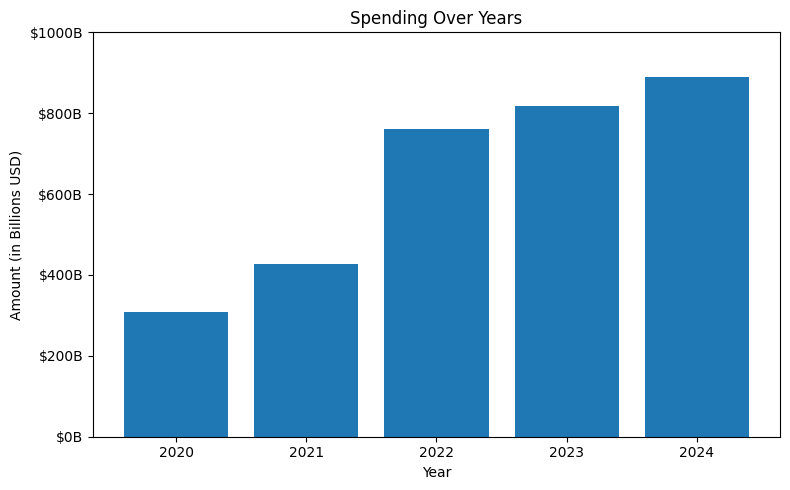

In [1]:
import matplotlib.pyplot as plt

# Data
years = ['2020', '2021', '2022', '2023', '2024']
values = [309, 428, 760.8, 816.8, 890]  # in billions

# Plot
plt.figure(figsize=(8, 5))
plt.bar(years, values)

# Labels
plt.title('Spending Over Years')
plt.ylabel('Amount (in Billions USD)')
plt.xlabel('Year')

# Format y-ticks with $ and B
plt.yticks([i for i in range(0, 1001, 200)], [f'${i}B' for i in range(0, 1001, 200)])

# Show
plt.tight_layout()
plt.show()


/var/folders/1_/vh5ppk9j3vvc6l2z4r6n7dbw0000gn/T/ipykernel_65757/2230343046.py:21: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/ananya/.pyenv/versions/3.11.8/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


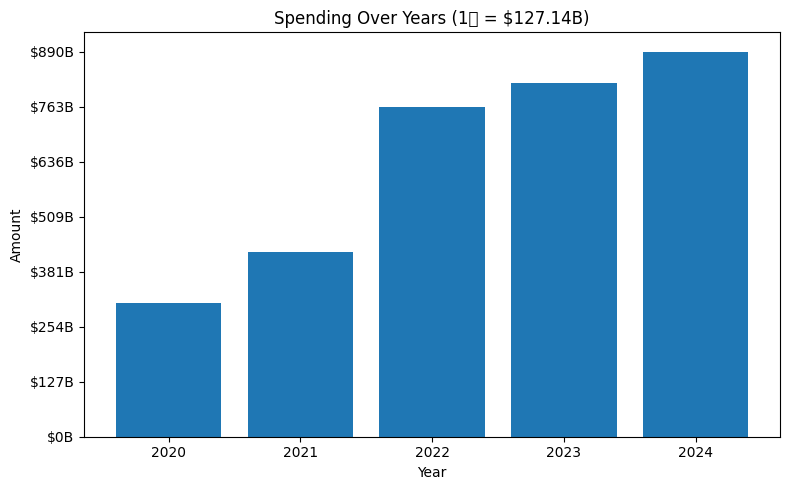

In [2]:
import matplotlib.pyplot as plt

years = ['2020', '2021', '2022', '2023', '2024']
values = [309, 428, 760.8, 816.8, 890]

# Convert values to emoji units (1 unit = $127.14B)
emoji_unit = 127.14
emoji_values = [v / emoji_unit for v in values]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(years, emoji_values)

# Set y-axis labels as dollar amounts
plt.yticks(range(0, 8), [f"${round(i * emoji_unit)}B" for i in range(0, 8)])

plt.title("Spending Over Years (1üíµ = $127.14B)")
plt.ylabel("Amount")
plt.xlabel("Year")

plt.tight_layout()
plt.show()

In [1]:
import requests
from bs4 import BeautifulSoup

url = "https://travel-id-documents.az.gov/authorized-third-party-driver-license-locations"


headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'
}


response = requests.get(url, headers=headers)


doc = BeautifulSoup(response.content, 'html.parser')

doc


<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="content: http://purl.org/rss/1.0/modules/content/  dc: http://purl.org/dc/terms/  foaf: http://xmlns.com/foaf/0.1/  og: http://ogp.me/ns#  rdfs: http://www.w3.org/2000/01/rdf-schema#  schema: http://schema.org/  sioc: http://rdfs.org/sioc/ns#  sioct: http://rdfs.org/sioc/types#  skos: http://www.w3.org/2004/02/skos/core#  xsd: http://www.w3.org/2001/XMLSchema# ">
<head>
<meta charset="utf-8"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-128597949-1"></script>
<script>window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments)};gtag("js", new Date());gtag("set", "developer_id.dMDhkMT", true);gtag("config", "UA-128597949-1", {"groups":"default","anonymize_ip":true,"page_placeholder":"PLACEHOLDER_page_path"});</script>
<link href="https://travel-id-documents.az.gov/authorized-third-party-driver-license-locations" rel="canonical"/>
<meta content="Drupal 9 (https://www.drupal.org)" name="Gene